# 10.K-means算法

In [1]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

## 10.1.支持函数

In [2]:
def loadDataSet(fileName):
    """
    读取数据集
    参数：
        fileName -- 文件名
    返回：
        dataMat -- 数据矩阵
    """
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        #以制表符分割
        curLine = line.strip().split('\t')
        #所有元素转换为float类型
        fltLine = list(map(float,curLine))
        dataMat.append(fltLine)
    return dataMat

In [3]:
def distEclud(vecA, vecB):
    """
    计算向量之间的距离
    参数：
        vecA -- 向量A
        vecB -- 向量B
    返回：
        向量相减求平方差再开方
    """
    return sqrt(sum(power(vecA - vecB, 2)))

In [4]:
def randCent(dataSet, k):
    """
    随机初始化簇中心
    参数：
        dataSet -- 数据集
        k -- 簇的个数
    返回：
        centroids -- 初始化后的中心点
    """
    #特征数
    n = shape(dataSet)[1]
    #初始化存储中心点位置的矩阵，k个n维向量
    centroids = mat(zeros((k,n)))
    #对每个特征维度
    for j in range(n):
        #取值范围
        minJ = min(dataSet[:,j]) 
        rangeJ = float(max(dataSet[:,j]) - minJ)
        #随机初始化
        centroids[:,j] = mat(minJ + rangeJ * random.rand(k,1))
    return centroids

读取测试数据

In [15]:
datMat = mat(loadDataSet("testSet.txt"))
print(datMat.shape)

(80, 2)


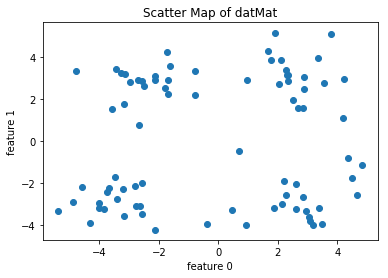

In [16]:
plt.scatter(datMat[:, 0].A, datMat[:, 1].A)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.title('Scatter Map of datMat')
plt.show()

In [7]:
print(f"特征0的最小值{min(datMat[:,0]).A}")
print(f"特征0的最大值{max(datMat[:,0]).A}")
print(f"特征1的最小值{min(datMat[:,1]).A}")
print(f"特征1的最大值{max(datMat[:,1]).A}")

特征0的最小值[[-5.379713]]
特征0的最大值[[4.838138]]
特征1的最小值[[-4.232586]]
特征1的最大值[[5.1904]]


In [8]:
randCent(datMat, 3)

matrix([[ 3.33903572,  4.20096022],
        [ 4.55527621,  3.88653018],
        [-1.19083137,  3.7450369 ]])

可见，随机生成的质心点在合理的范围之内

## 10.2.K-means函数

In [8]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent, plot=False):
    """
    K-means函数
    参数：
        dataSet -- 数据集
        k -- 簇的个数
        distMeas -- 计算点间距离的方法
        createCent -- 生成质心点的方法
        plot -- 是否可视化聚类过程，默认为否
    返回：
        centroids -- 质心点
        clusterAssment -- 簇的分配
    """
    #数据集中的点的个数
    m = shape(dataSet)[0]
    #转换为矩阵
    clusterAssment = mat(zeros((m,2)))
    #初始化中心点
    centroids = createCent(dataSet, k)
    #簇分配改变是否发生变化的标记
    clusterChanged = True
    #当簇分配始终在变化时
    while clusterChanged:
        #初始化标记
        clusterChanged = False
        #为每个点分配对应的簇
        for i in range(m):
            #初始化最小距离，最近质心的索引
            minDist = inf; minIndex = -1
            #对于每一个质心，计算并比较距离
            for j in range(k):
                #计算质心j和点i之间的距离
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                #记录最近的质心点的信息
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            #如果簇类分配发生了变化，则标记
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            #刷新分配表
            clusterAssment[i,:] = minIndex,minDist**2
        #打印结果
        #print(centroids)
        #重新计算质心位置
        for cent in range(k):
            #得到所有该类的点
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]
            #计算该类点的质心
            centroids[cent,:] = mean(ptsInClust, axis=0)
        #如果需要可视化过程
        if plot:
            visKMeans(dataSet, centroids, clusterAssment)
    return centroids, clusterAssment

可视化结果

In [9]:
def visKMeans(dataSet, centroids, clusterAssment):
    """
    可视化K-means得到的结果
    参数：
        dataSet -- 数据集
        centroids -- 质心点
        clusterAssment -- 簇分配结果
    返回：
        无 -- 绘图函数
    """
    #得到簇数
    k = centroids.shape[0]
    #得到样本点数
    m = dataSet.shape[0]
    #指定ColorMap映射关系
    cm = plt.cm.get_cmap('RdYlBu')
    #数据点的colormap
    datColorMap = clusterAssment[:, 0].A.squeeze().tolist()
    #质心的Colormap
    cluColorMap = range(k)
    #绘制数据散点图
    sd = plt.scatter(datMat.A[:,0], datMat.A[:,1], c=datColorMap, cmap=cm, alpha=0.3)
    #绘制质心散点图
    sc = plt.scatter(centroids.A[:,0], centroids.A[:,1], c=cluColorMap, cmap=cm, marker='+', s=200)
    cbar = plt.colorbar(sd)
    cbar.set_ticks(linspace(0,stop=k,num=k, endpoint=False))
    cbar.set_ticklabels((['cluster'+str(i) for i in range(k)]))
    plt.legend(handles=[sd, sc], labels=['data points', 'centroids'])
    plt.xlabel('feature 0')
    plt.ylabel('feature 1')
    plt.title('Scatter Map of Clusters and Centroids')
    plt.show()

简单数据集上的结果

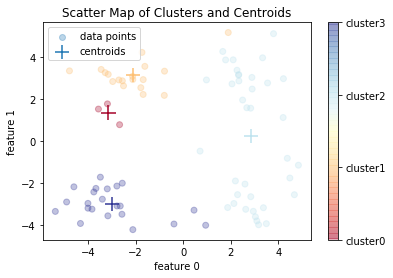

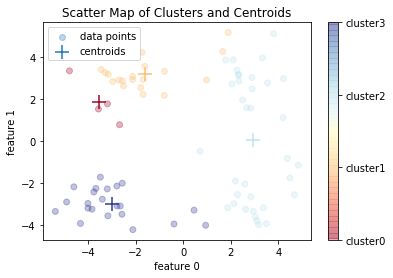

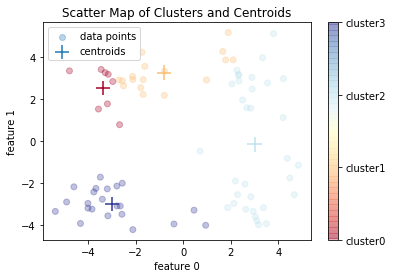

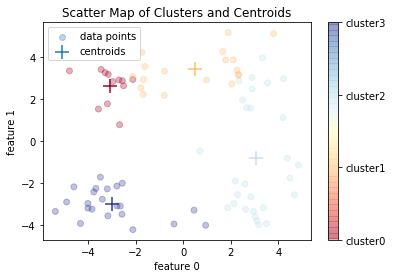

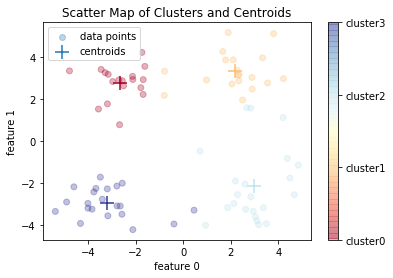

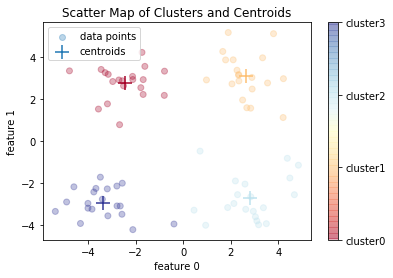

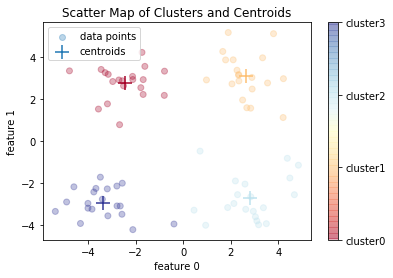

质心点为：
[[-2.46154315  2.78737555]
 [ 2.6265299   3.10868015]
 [ 2.80293085 -2.7315146 ]
 [-3.38237045 -2.9473363 ]]


In [10]:
myCentorids, clustAssing = kMeans(datMat, 4, plot=True)
print(f"质心点为：\n{myCentorids}")
#print(f"分配结果为：\n{clustAssing}")

## 10.3.二分K-means

In [23]:
def biKmeans(dataSet, k, distMeas=distEclud, plot=False):
    """
    二分K-means算法
    参数：
        dataSet -- 数据集
        k -- 簇的数目
        distMeas -- 计算点之间距离的方法
        plot -- 是否绘制过程，默认为否
    返回：
        mat(centList) -- 质心坐标
        clusterAssment -- 簇分配结果
    """
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    #初始的质心，只有一个
    centroid0 = mean(dataSet, axis=0).tolist()[0]
    centList =[centroid0]
    #计算初始误差
    for j in range(m):
        clusterAssment[j,1] = distMeas(mat(centroid0), dataSet[j,:])**2
    #簇数小于k时，应继续划分
    while (len(centList) < k):
        #最小误差初始化为无穷大
        lowestSSE = inf
        #对现在的每一簇
        for i in range(len(centList)):
            #划分簇
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:,0].A==i)[0],:]
            #二分kMeans
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)
            #比较这种划分方式的误差
            sseSplit = sum(splitClustAss[:,1])
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A!=i)[0],1])
            print(f"划分后的误差 = {sseSplit}, 划分前的误差 = {sseNotSplit}")
            #判断并记录较优值
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        #划分
        bestClustAss[nonzero(bestClustAss[:,0].A == 1)[0],0] = len(centList)
        bestClustAss[nonzero(bestClustAss[:,0].A == 0)[0],0] = bestCentToSplit
        print(f'最佳划分簇是：{bestCentToSplit}')
        print(f'最佳划分的长度是: {len(bestClustAss)}')
        #把待划分的簇的质心替换为两个新质心
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]
        centList.append(bestNewCents[1,:].tolist()[0])
        #更新簇分配列表
        clusterAssment[nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss
        #可视化二分聚类过程
        if plot:
            visKMeans(dataSet, mat(centList), clusterAssment)
    return mat(centList), clusterAssment

在相同的数据集上测试

划分后的误差 = 828.6926539968681, 划分前的误差 = 0.0
最佳划分簇是：0
最佳划分的长度是: 80


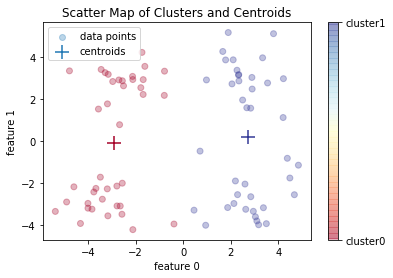

划分后的误差 = 62.64959202653465, 划分前的误差 = 428.6946327807764
划分后的误差 = 87.30471264989171, 划分前的误差 = 399.99802121609173
最佳划分簇是：1
最佳划分的长度是: 40


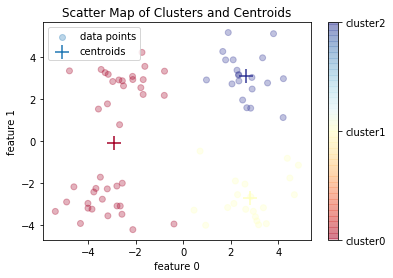

划分后的误差 = 62.64959202653465, 划分前的误差 = 87.30471264989171
划分后的误差 = 28.338601567820938, 划分前的误差 = 436.3165071745162
划分后的误差 = 20.827325678666497, 划分前的误差 = 450.98424790755917
最佳划分簇是：0
最佳划分的长度是: 40


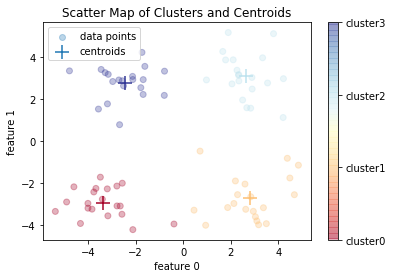

In [21]:
centList, myNewAssments = biKmeans(datMat, 4, plot=True)

## 10.4.地图上的聚类

### 10.4.1.Yahoo! PlaceFinder API

In [19]:
import urllib
import json
def geoGrab(stAddress, city):
    apiStem = 'http://where.yahooapis.com/geocode?'
    params = {}
    params['flags'] = 'J'
    params['appid'] = 'aaa0VN6k'
    params['location'] = '%s %s' % (stAddress, city)
    url_params = urllib.urlencode(params)
    yahooApi = apiStem + url_params
    print(yahooApi)
    c=urllib.urlopen(yahooApi)
    return json.loads(c.read())

from time import sleep
def massPlaceFind(fileName):
    fw = open('places.txt', 'w')
    for line in open(fileName).readlines():
        line = line.strip()
        lineArr = line.split('\t')
        retDict = geoGrab(lineArr[1], lineArr[2])
        if retDict['ResultSet']['Error'] == 0:
            lat = float(retDict['ResultSet']['Results'][0]['latitude'])
            lng = float(retDict['ResultSet']['Results'][0]['longitude'])
            print("%s\t%f\t%f" % (lineArr[0], lat, lng))
            fw.write('%s\t%f\t%f\n' % (line, lat, lng))
        else: print("error fetching")
        sleep(1)
    fw.close()

### 10.4.2.对地理坐标进行聚类

In [20]:
def distSLC(vecA, vecB):
    """
    球面距离
    参数：
        vecA -- 向量A
        vecB -- 向量B
    """
    a = sin(vecA[0,1]*pi/180) * sin(vecB[0,1]*pi/180)
    b = cos(vecA[0,1]*pi/180) * cos(vecB[0,1]*pi/180) * \
                      cos(pi * (vecB[0,0]-vecA[0,0]) /180)
    return arccos(a + b)*6371.0

In [21]:
def clusterClubs(numClust=5):
    datList = []
    for line in open('places.txt').readlines():
        lineArr = line.split('\t')
        datList.append([float(lineArr[4]), float(lineArr[3])])
    datMat = mat(datList)
    myCentroids, clustAssing = biKmeans(datMat, numClust, distMeas=distSLC)
    fig = plt.figure()
    rect=[0.1,0.1,0.8,0.8]
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    imgP = plt.imread('Portland.png')
    ax0.imshow(imgP)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = datMat[nonzero(clustAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)
    plt.show()

划分后的误差 = 3043.2633161055337, 划分前的误差 = 0.0
最佳划分簇是：0
最佳划分的长度是: 69
划分后的误差 = 501.3287882204044, 划分前的误差 = 2191.824427523823
划分后的误差 = 1486.777796110165, 划分前的误差 = 851.4388885817106
最佳划分簇是：1
最佳划分的长度是: 39
划分后的误差 = 2770.7408197260597, 划分前的误差 = 1486.777796110165
划分后的误差 = 401.2000194594552, 划分前的误差 = 1491.490570445267
划分后的误差 = 234.49990074938086, 划分前的误差 = 1698.1650028283193
最佳划分簇是：1
最佳划分的长度是: 27
划分后的误差 = 464.7205983452951, 划分前的误差 = 1041.2517013230115
划分后的误差 = 32.586855469814154, 划分前的误差 = 1754.6443389763663
划分后的误差 = 337.90310497504026, 划分前的误差 = 1252.6389080411657
划分后的误差 = 72.23391451935902, 划分前的误差 = 1629.5368213736228
最佳划分簇是：0
最佳划分的长度是: 30


F:\Anaconda\lib\site-packages\numpy\matrixlib\defmatrix.py:442: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
F:\Anaconda\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


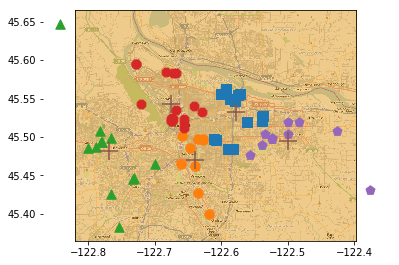

In [24]:
clusterClubs(5)